# Principal Component Analysis on Hand Written Digit Dataset

## Libraries

In [172]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## The Dataset

In [173]:
from sklearn.datasets import load_digits

In [174]:
digit = load_digits()

In [175]:
digit

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [176]:
digit.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [177]:
print(digit['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [178]:
digit['images']

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [179]:
print(type(digit['images']))
digit['images'].shape

<class 'numpy.ndarray'>


(1797, 8, 8)

In [180]:
digit['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [181]:
digit['data'].shape

(1797, 64)

In [182]:
digit['target']

array([0, 1, 2, ..., 8, 9, 8])

In [183]:
digit['target'].shape

(1797,)

In [184]:
digit['target_names']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [185]:
digit['feature_names']

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [186]:
digit['images'][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [187]:
digit['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [188]:
digit['data'][0].shape

(64,)

In [189]:
digit['data'][0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

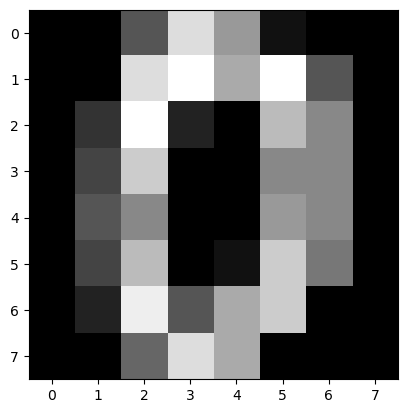

In [190]:
plt.imshow(digit['images'][0],cmap='gray')
plt.show()

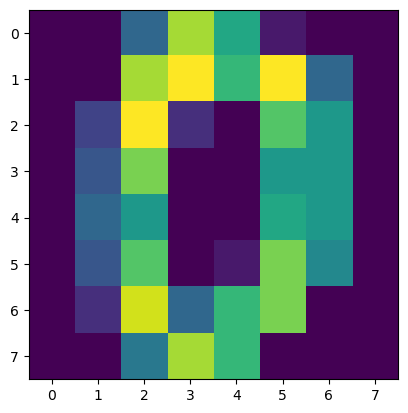

In [191]:
plt.imshow(digit['images'][0])
plt.show()

# Step by step Principal Component Analysis

## 1. Standardization of Data

In [192]:
original_data = pd.DataFrame(digit['data'],columns=digit['feature_names'])

original_data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [193]:
original_data.describe().loc[['mean','std']]

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122


In [194]:
original_data.describe().loc[['mean','std']].loc['mean']

pixel_0_0     0.000000
pixel_0_1     0.303840
pixel_0_2     5.204786
pixel_0_3    11.835838
pixel_0_4    11.848080
               ...    
pixel_7_3    12.089037
pixel_7_4    11.809126
pixel_7_5     6.764051
pixel_7_6     2.067891
pixel_7_7     0.364496
Name: mean, Length: 64, dtype: float64

In [195]:
original_data.describe().loc[['mean','std']].loc['std']

pixel_0_0    0.000000
pixel_0_1    0.907192
pixel_0_2    4.754826
pixel_0_3    4.248842
pixel_0_4    4.287388
               ...   
pixel_7_3    4.374694
pixel_7_4    4.933947
pixel_7_5    5.900623
pixel_7_6    4.090548
pixel_7_7    1.860122
Name: std, Length: 64, dtype: float64

In [196]:
s = original_data.describe().loc[['mean','std']].loc['mean']
s

pixel_0_0     0.000000
pixel_0_1     0.303840
pixel_0_2     5.204786
pixel_0_3    11.835838
pixel_0_4    11.848080
               ...    
pixel_7_3    12.089037
pixel_7_4    11.809126
pixel_7_5     6.764051
pixel_7_6     2.067891
pixel_7_7     0.364496
Name: mean, Length: 64, dtype: float64

In [197]:
s.index

Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7'],
      dtype='object')

In [198]:
# just counting if any mean or std of any band or feature is 0

count = 0
for i in s.index :
    if s[i] == 0 :
        count = count + 1
        print(i)
print(count)

print()

count = 0
s = original_data.describe().loc[['mean','std']].loc['std']

for i in s.index :
    if s[i] == 0 :
        count = count + 1
        print(i)
print(count)

pixel_0_0
pixel_4_0
pixel_4_7
3

pixel_0_0
pixel_4_0
pixel_4_7
3


so these 3 features 'pixel_0_0','pixel_4_0' and 'pixel_4_7' have mean = 0 and std = 0. That's why , need to be careful while calculating standard data

In [199]:
# standardizing the data

l = list()
data = dict()

for i in original_data.columns:
    mean = original_data[i].mean()
    std = original_data[i].std()

    for x in original_data[i]:
        if std != 0 :
            z = (x - mean) / std
        else:
            z = 0
        l.append(z)

    data[i] = l
    l = list()

data

{'pixel_0_0': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

In [200]:
standardized_data = pd.DataFrame(data)

standardized_data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0,-0.334923,-0.043069,0.273995,-0.664293,-0.843894,-0.409610,-0.124988,-0.059061,-0.623836,...,-0.757225,-0.209727,-0.02359,-0.298998,0.086695,0.208235,-0.366669,-1.146328,-0.505529,-0.195953
1,0,-0.334923,-1.094632,0.038637,0.268676,-0.137981,-0.409610,-0.124988,-0.059061,-0.623836,...,-0.757225,-0.209727,-0.02359,-0.298998,-1.089080,-0.248940,0.849396,0.548408,-0.505529,-0.195953
2,0,-0.334923,-1.094632,-1.844229,0.735161,1.097367,-0.409610,-0.124988,-0.059061,-0.623836,...,0.259158,-0.209727,-0.02359,-0.298998,-1.089080,-2.077640,-0.163992,1.565250,1.694665,-0.195953
3,0,-0.334923,0.377556,0.744712,0.268676,-0.843894,-0.409610,-0.124988,-0.059061,1.879168,...,1.072264,-0.209727,-0.02359,-0.298998,0.282657,0.208235,0.241363,0.378934,-0.505529,-0.195953
4,0,-0.334923,-1.094632,-2.550304,-0.197808,-1.020373,-0.409610,-0.124988,-0.059061,-0.623836,...,-0.757225,-0.209727,-0.02359,-0.298998,-1.089080,-2.306227,0.849396,-0.468434,-0.505529,-0.195953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0,-0.334923,-0.253382,-0.432080,0.268676,0.038497,-0.409610,-0.124988,-0.059061,-0.310960,...,0.055881,-0.209727,-0.02359,-0.298998,-0.697155,0.436822,0.646718,0.378934,-0.505529,-0.195953
1793,0,-0.334923,0.167244,0.980070,0.268676,0.920889,-0.108928,-0.124988,-0.059061,-0.623836,...,-0.553948,-0.209727,-0.02359,-0.298998,0.086695,0.893997,0.444041,-0.129487,-0.505529,-0.195953
1794,0,-0.334923,-0.884320,-0.196721,0.735161,-0.843894,-0.409610,-0.124988,-0.059061,-0.623836,...,-0.757225,-0.209727,-0.02359,-0.298998,-0.697155,-0.706115,0.241363,-0.129487,-0.505529,-0.195953
1795,0,-0.334923,-0.674007,-0.432080,-1.130777,-1.020373,-0.409610,-0.124988,-0.059061,-0.623836,...,-0.350672,-0.209727,-0.02359,-0.298998,-0.109268,-0.020353,0.849396,0.887355,-0.505529,-0.195953


In [201]:
standardized_data.describe().loc[['mean','std']]

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
mean,0.0,2.780191e-16,1.367854e-16,2.002355e-16,-1.698388e-16,2.467574e-16,-6.089854e-16,8.861087e-16,3.944319e-16,-1.357392e-15,...,-4.510088e-16,9.486630e-16,-6.059620e-16,2.381697e-16,3.065624e-16,1.570885e-16,-1.238730e-17,-6.808379e-16,-4.867497e-16,-1.698851e-15
std,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## 2. Calculate the covariance matrix

In [202]:
standardized_data.cov()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
pixel_0_0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
pixel_0_1,0.0,1.000000,0.556618,0.207814,-0.018761,0.060776,0.048388,-0.038927,0.032320,0.556372,...,0.030953,-0.045342,-0.007905,0.855610,0.555727,0.147646,-0.102349,-0.029870,0.026547,-0.043889
pixel_0_2,0.0,0.556618,1.000000,0.560180,-0.084235,0.043569,0.002841,-0.062278,0.022311,0.582259,...,0.050849,-0.003804,-0.025837,0.515276,0.937623,0.499840,-0.134754,-0.041183,0.072599,0.082523
pixel_0_3,0.0,0.207814,0.560180,1.000000,0.023938,-0.171377,-0.115732,-0.040139,0.035663,0.328344,...,0.139397,0.075335,-0.049085,0.175804,0.560326,0.767945,-0.065957,-0.054936,0.053437,0.081971
pixel_0_4,0.0,-0.018761,-0.084235,0.023938,1.000000,0.507731,0.127764,0.010065,0.042065,0.051657,...,-0.264968,-0.212220,0.017352,-0.047223,-0.020176,-0.008867,-0.082125,-0.215809,-0.250699,-0.215349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel_7_3,0.0,0.147646,0.499840,0.767945,-0.008867,-0.068038,-0.045845,0.001013,0.043374,0.305191,...,0.094718,0.050032,-0.038248,0.112972,0.481711,1.000000,0.058390,-0.094956,0.006849,0.099671
pixel_7_4,0.0,-0.102349,-0.134754,-0.065957,-0.082125,-0.351146,-0.383522,-0.178243,0.048996,-0.000604,...,0.394280,0.105101,0.005697,-0.117908,-0.207957,0.058390,1.000000,0.609515,0.243305,0.103015
pixel_7_5,0.0,-0.029870,-0.041183,-0.054936,-0.215809,-0.268818,-0.304111,-0.141174,0.033409,0.071488,...,0.707519,0.262795,-0.003056,-0.043889,-0.091839,-0.094956,0.609515,1.000000,0.648328,0.261991
pixel_7_6,0.0,0.026547,0.072599,0.053437,-0.250699,-0.267659,-0.178945,-0.063220,0.020689,0.111569,...,0.602267,0.511726,-0.011932,0.014557,0.035369,0.006849,0.243305,0.648328,1.000000,0.620428


## 3. Calculate eigenvalues and eigenvectors

In [203]:
from numpy.linalg import eig

In [204]:
a = standardized_data.cov()
a

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
pixel_0_0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
pixel_0_1,0.0,1.000000,0.556618,0.207814,-0.018761,0.060776,0.048388,-0.038927,0.032320,0.556372,...,0.030953,-0.045342,-0.007905,0.855610,0.555727,0.147646,-0.102349,-0.029870,0.026547,-0.043889
pixel_0_2,0.0,0.556618,1.000000,0.560180,-0.084235,0.043569,0.002841,-0.062278,0.022311,0.582259,...,0.050849,-0.003804,-0.025837,0.515276,0.937623,0.499840,-0.134754,-0.041183,0.072599,0.082523
pixel_0_3,0.0,0.207814,0.560180,1.000000,0.023938,-0.171377,-0.115732,-0.040139,0.035663,0.328344,...,0.139397,0.075335,-0.049085,0.175804,0.560326,0.767945,-0.065957,-0.054936,0.053437,0.081971
pixel_0_4,0.0,-0.018761,-0.084235,0.023938,1.000000,0.507731,0.127764,0.010065,0.042065,0.051657,...,-0.264968,-0.212220,0.017352,-0.047223,-0.020176,-0.008867,-0.082125,-0.215809,-0.250699,-0.215349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel_7_3,0.0,0.147646,0.499840,0.767945,-0.008867,-0.068038,-0.045845,0.001013,0.043374,0.305191,...,0.094718,0.050032,-0.038248,0.112972,0.481711,1.000000,0.058390,-0.094956,0.006849,0.099671
pixel_7_4,0.0,-0.102349,-0.134754,-0.065957,-0.082125,-0.351146,-0.383522,-0.178243,0.048996,-0.000604,...,0.394280,0.105101,0.005697,-0.117908,-0.207957,0.058390,1.000000,0.609515,0.243305,0.103015
pixel_7_5,0.0,-0.029870,-0.041183,-0.054936,-0.215809,-0.268818,-0.304111,-0.141174,0.033409,0.071488,...,0.707519,0.262795,-0.003056,-0.043889,-0.091839,-0.094956,0.609515,1.000000,0.648328,0.261991
pixel_7_6,0.0,0.026547,0.072599,0.053437,-0.250699,-0.267659,-0.178945,-0.063220,0.020689,0.111569,...,0.602267,0.511726,-0.011932,0.014557,0.035369,0.006849,0.243305,0.648328,1.000000,0.620428


In [205]:
w,v=eig(a)
print('eigenvalues :\n', w)
print()
print('eigenvectors :\n', v)

eigenvalues :
 [7.34068882 5.83224319 5.15109308 3.96402882 2.96469447 2.57061312
 2.40467051 2.06752236 1.82891482 1.78852156 1.69690133 1.57200361
 1.38793502 1.35857964 1.32078995 1.16764163 1.08308372 0.99922226
 0.9738407  0.90840662 0.82226144 0.77587814 0.71116078 0.64516443
 0.59494273 0.57618098 0.52643843 0.51035214 0.48659288 0.45534754
 0.44260511 0.42206586 0.39888421 0.39088347 0.36074431 0.34840907
 0.31941845 0.29390263 0.27676875 0.05034641 0.0632544  0.25812928
 0.24769237 0.24222173 0.07631145 0.08242223 0.09013524 0.098354
 0.1024473  0.11182428 0.11926258 0.12419456 0.13313668 0.14303463
 0.21746091 0.15809671 0.16865845 0.20788018 0.17603093 0.19997955
 0.18972952 0.         0.         0.        ]

eigenvectors :
 [[ 0.          0.          0.         ...  1.          0.
   0.        ]
 [ 0.18223392 -0.04702701  0.02358821 ...  0.          0.
   0.        ]
 [ 0.285868   -0.0595648  -0.05679875 ...  0.          0.
   0.        ]
 ...
 [ 0.103198    0.24261778 -0.0

## 4. Sort the eigenvector in descending order based on eigenvalues and form feature vector

In [206]:
a

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
pixel_0_0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
pixel_0_1,0.0,1.000000,0.556618,0.207814,-0.018761,0.060776,0.048388,-0.038927,0.032320,0.556372,...,0.030953,-0.045342,-0.007905,0.855610,0.555727,0.147646,-0.102349,-0.029870,0.026547,-0.043889
pixel_0_2,0.0,0.556618,1.000000,0.560180,-0.084235,0.043569,0.002841,-0.062278,0.022311,0.582259,...,0.050849,-0.003804,-0.025837,0.515276,0.937623,0.499840,-0.134754,-0.041183,0.072599,0.082523
pixel_0_3,0.0,0.207814,0.560180,1.000000,0.023938,-0.171377,-0.115732,-0.040139,0.035663,0.328344,...,0.139397,0.075335,-0.049085,0.175804,0.560326,0.767945,-0.065957,-0.054936,0.053437,0.081971
pixel_0_4,0.0,-0.018761,-0.084235,0.023938,1.000000,0.507731,0.127764,0.010065,0.042065,0.051657,...,-0.264968,-0.212220,0.017352,-0.047223,-0.020176,-0.008867,-0.082125,-0.215809,-0.250699,-0.215349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel_7_3,0.0,0.147646,0.499840,0.767945,-0.008867,-0.068038,-0.045845,0.001013,0.043374,0.305191,...,0.094718,0.050032,-0.038248,0.112972,0.481711,1.000000,0.058390,-0.094956,0.006849,0.099671
pixel_7_4,0.0,-0.102349,-0.134754,-0.065957,-0.082125,-0.351146,-0.383522,-0.178243,0.048996,-0.000604,...,0.394280,0.105101,0.005697,-0.117908,-0.207957,0.058390,1.000000,0.609515,0.243305,0.103015
pixel_7_5,0.0,-0.029870,-0.041183,-0.054936,-0.215809,-0.268818,-0.304111,-0.141174,0.033409,0.071488,...,0.707519,0.262795,-0.003056,-0.043889,-0.091839,-0.094956,0.609515,1.000000,0.648328,0.261991
pixel_7_6,0.0,0.026547,0.072599,0.053437,-0.250699,-0.267659,-0.178945,-0.063220,0.020689,0.111569,...,0.602267,0.511726,-0.011932,0.014557,0.035369,0.006849,0.243305,0.648328,1.000000,0.620428


In [207]:
a.shape

(64, 64)

In [208]:
eigen_number = a.shape[0]
eigen_number

64

In [209]:
# grabbing the eigenectors from 'v'

l = list()

for i in range(eigen_number):
    s = v[:,i]
    s2 = s.reshape(eigen_number,1)
    l.append(s2)

l

[array([[ 0.        ],
        [ 0.18223392],
        [ 0.285868  ],
        [ 0.22036967],
        [-0.02516956],
        [-0.00949725],
        [-0.0524765 ],
        [-0.06269499],
        [ 0.03470727],
        [ 0.24553368],
        [ 0.22915174],
        [-0.10794381],
        [ 0.03620209],
        [ 0.03871159],
        [-0.08378077],
        [-0.09277502],
        [ 0.01669934],
        [ 0.1367165 ],
        [-0.06305075],
        [-0.12287927],
        [ 0.14819348],
        [-0.02348425],
        [-0.1711997 ],
        [-0.10420837],
        [-0.00394882],
        [-0.1163897 ],
        [-0.18820473],
        [ 0.0658604 ],
        [ 0.14353257],
        [-0.12820705],
        [-0.18062075],
        [-0.05270917],
        [ 0.        ],
        [-0.23890251],
        [-0.23500613],
        [-0.00509137],
        [-0.01310881],
        [-0.15911618],
        [-0.12939416],
        [ 0.        ],
        [-0.05559906],
        [-0.18715707],
        [-0.15353371],
        [-0

In [210]:
l[0]

array([[ 0.        ],
       [ 0.18223392],
       [ 0.285868  ],
       [ 0.22036967],
       [-0.02516956],
       [-0.00949725],
       [-0.0524765 ],
       [-0.06269499],
       [ 0.03470727],
       [ 0.24553368],
       [ 0.22915174],
       [-0.10794381],
       [ 0.03620209],
       [ 0.03871159],
       [-0.08378077],
       [-0.09277502],
       [ 0.01669934],
       [ 0.1367165 ],
       [-0.06305075],
       [-0.12287927],
       [ 0.14819348],
       [-0.02348425],
       [-0.1711997 ],
       [-0.10420837],
       [-0.00394882],
       [-0.1163897 ],
       [-0.18820473],
       [ 0.0658604 ],
       [ 0.14353257],
       [-0.12820705],
       [-0.18062075],
       [-0.05270917],
       [ 0.        ],
       [-0.23890251],
       [-0.23500613],
       [-0.00509137],
       [-0.01310881],
       [-0.15911618],
       [-0.12939416],
       [ 0.        ],
       [-0.05559906],
       [-0.18715707],
       [-0.15353371],
       [-0.04682572],
       [-0.11089272],
       [-0

In [211]:
len(l)

64

In [212]:
# sorting eigenvector based on eigenvalues

for i in range(len(w)):
    for j in range(i+1,len(w)):
        if w[j] > w[i] :
            temp = w[i]
            w[i] = w[j]
            w[j] = temp

            temp2 = l[i]
            l[i] = l[j]
            l[j] = temp2

print(w)
print(l)

[7.34068882 5.83224319 5.15109308 3.96402882 2.96469447 2.57061312
 2.40467051 2.06752236 1.82891482 1.78852156 1.69690133 1.57200361
 1.38793502 1.35857964 1.32078995 1.16764163 1.08308372 0.99922226
 0.9738407  0.90840662 0.82226144 0.77587814 0.71116078 0.64516443
 0.59494273 0.57618098 0.52643843 0.51035214 0.48659288 0.45534754
 0.44260511 0.42206586 0.39888421 0.39088347 0.36074431 0.34840907
 0.31941845 0.29390263 0.27676875 0.25812928 0.24769237 0.24222173
 0.21746091 0.20788018 0.19997955 0.18972952 0.17603093 0.16865845
 0.15809671 0.14303463 0.13313668 0.12419456 0.11926258 0.11182428
 0.1024473  0.098354   0.09013524 0.08242223 0.07631145 0.0632544
 0.05034641 0.         0.         0.        ]
[array([[ 0.        ],
       [ 0.18223392],
       [ 0.285868  ],
       [ 0.22036967],
       [-0.02516956],
       [-0.00949725],
       [-0.0524765 ],
       [-0.06269499],
       [ 0.03470727],
       [ 0.24553368],
       [ 0.22915174],
       [-0.10794381],
       [ 0.03620209]

In [213]:
np.hstack(l)

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.18223392, -0.04702701,  0.02358821, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.285868  , -0.0595648 , -0.05679875, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.103198  ,  0.24261778, -0.02227952, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1198106 ,  0.16508926,  0.10036559, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07149362,  0.07132924,  0.09244589, ...,  0.        ,
         0.        ,  0.        ]])

In [214]:
# forming feature vector

V = np.hstack(l)
V

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.18223392, -0.04702701,  0.02358821, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.285868  , -0.0595648 , -0.05679875, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.103198  ,  0.24261778, -0.02227952, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1198106 ,  0.16508926,  0.10036559, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07149362,  0.07132924,  0.09244589, ...,  0.        ,
         0.        ,  0.        ]])

In [215]:
V.shape

(64, 64)

## 5. Calculate the principal components

In [216]:
D = standardized_data
D

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0,-0.334923,-0.043069,0.273995,-0.664293,-0.843894,-0.409610,-0.124988,-0.059061,-0.623836,...,-0.757225,-0.209727,-0.02359,-0.298998,0.086695,0.208235,-0.366669,-1.146328,-0.505529,-0.195953
1,0,-0.334923,-1.094632,0.038637,0.268676,-0.137981,-0.409610,-0.124988,-0.059061,-0.623836,...,-0.757225,-0.209727,-0.02359,-0.298998,-1.089080,-0.248940,0.849396,0.548408,-0.505529,-0.195953
2,0,-0.334923,-1.094632,-1.844229,0.735161,1.097367,-0.409610,-0.124988,-0.059061,-0.623836,...,0.259158,-0.209727,-0.02359,-0.298998,-1.089080,-2.077640,-0.163992,1.565250,1.694665,-0.195953
3,0,-0.334923,0.377556,0.744712,0.268676,-0.843894,-0.409610,-0.124988,-0.059061,1.879168,...,1.072264,-0.209727,-0.02359,-0.298998,0.282657,0.208235,0.241363,0.378934,-0.505529,-0.195953
4,0,-0.334923,-1.094632,-2.550304,-0.197808,-1.020373,-0.409610,-0.124988,-0.059061,-0.623836,...,-0.757225,-0.209727,-0.02359,-0.298998,-1.089080,-2.306227,0.849396,-0.468434,-0.505529,-0.195953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0,-0.334923,-0.253382,-0.432080,0.268676,0.038497,-0.409610,-0.124988,-0.059061,-0.310960,...,0.055881,-0.209727,-0.02359,-0.298998,-0.697155,0.436822,0.646718,0.378934,-0.505529,-0.195953
1793,0,-0.334923,0.167244,0.980070,0.268676,0.920889,-0.108928,-0.124988,-0.059061,-0.623836,...,-0.553948,-0.209727,-0.02359,-0.298998,0.086695,0.893997,0.444041,-0.129487,-0.505529,-0.195953
1794,0,-0.334923,-0.884320,-0.196721,0.735161,-0.843894,-0.409610,-0.124988,-0.059061,-0.623836,...,-0.757225,-0.209727,-0.02359,-0.298998,-0.697155,-0.706115,0.241363,-0.129487,-0.505529,-0.195953
1795,0,-0.334923,-0.674007,-0.432080,-1.130777,-1.020373,-0.409610,-0.124988,-0.059061,-0.623836,...,-0.350672,-0.209727,-0.02359,-0.298998,-0.109268,-0.020353,0.849396,0.887355,-0.505529,-0.195953


In [217]:
V

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.18223392, -0.04702701,  0.02358821, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.285868  , -0.0595648 , -0.05679875, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.103198  ,  0.24261778, -0.02227952, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1198106 ,  0.16508926,  0.10036559, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07149362,  0.07132924,  0.09244589, ...,  0.        ,
         0.        ,  0.        ]])

In [218]:
transformed_table = np.dot(D,V)
transformed_table

array([[-1.91368097,  0.95423595, -3.94493672, ...,  0.        ,
         0.        ,  0.        ],
       [-0.58881643, -0.92437849,  3.92366276, ...,  0.        ,
         0.        ,  0.        ],
       [-1.30167673,  0.31710056,  3.0224916 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.02231142,  0.14786971,  2.46928631, ...,  0.        ,
         0.        ,  0.        ],
       [-1.07575577,  0.38080026, -2.45480362, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.25735234,  2.22697098,  0.28354896, ...,  0.        ,
         0.        ,  0.        ]])

In [219]:
transformed_table = pd.DataFrame(transformed_table)
transformed_table

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-1.913681,0.954236,-3.944937,-2.028159,-0.267098,0.530179,1.414927,1.495645,0.124880,0.822017,...,-0.217224,0.184608,-0.152351,-0.486067,-0.009388,0.009185,-0.027504,0.0,0.0,0.0
1,-0.588816,-0.924378,3.923663,1.779355,-0.993153,-0.675464,-1.878042,0.556181,1.079577,-0.087426,...,-0.005320,-0.267875,-0.511732,0.422361,0.090560,-0.127843,-0.103072,0.0,0.0,0.0
2,-1.301677,0.317101,3.022492,2.042808,-2.080576,0.934860,1.295840,1.155839,0.785387,1.098900,...,-0.178574,-0.066992,0.112178,-0.034318,-0.444322,0.518679,0.179379,0.0,0.0,0.0
3,3.019930,0.868531,-0.801521,2.186430,-0.556658,0.726921,-0.959498,-1.382254,0.259003,-0.744347,...,0.115411,-0.264052,0.018907,0.153645,-0.275200,0.115890,0.101720,0.0,0.0,0.0
4,-4.527689,1.093176,0.972850,1.419115,-1.714629,1.431193,-1.073350,-0.967971,-1.659754,-1.174266,...,0.335005,0.098668,0.291997,-0.157296,0.122839,0.084877,-0.072025,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,-0.104302,-0.254953,-3.764813,1.946464,-0.190041,-0.555605,-0.531075,0.476342,1.152109,0.472923,...,0.172597,0.255618,-0.041547,0.301907,0.041743,-0.009939,0.111734,0.0,0.0,0.0
1793,-2.422560,1.429213,-3.044398,-2.631357,-0.822673,0.004060,1.106564,2.330255,0.569297,1.653713,...,0.186824,0.424333,-0.249289,0.183693,-0.422377,-0.374513,-0.138616,0.0,0.0,0.0
1794,-1.022311,0.147870,2.469286,0.620134,-0.971772,-0.007375,-0.381009,0.528917,2.054138,2.036271,...,0.177294,0.048960,0.002682,-0.081585,-0.441991,-0.061036,-0.102124,0.0,0.0,0.0
1795,-1.075756,0.380800,-2.454804,1.311648,0.253462,-0.638144,-1.034182,0.763112,1.077174,0.334434,...,0.320656,0.025119,-0.098569,-0.083519,0.300060,0.306069,-0.593981,0.0,0.0,0.0


In [220]:
len(transformed_table.columns)

64

In [221]:
l = list()

for i in range(len(transformed_table.columns)):
    count = i + 1
    s = 'PC' + str(count)
    l.append(s)
l

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19',
 'PC20',
 'PC21',
 'PC22',
 'PC23',
 'PC24',
 'PC25',
 'PC26',
 'PC27',
 'PC28',
 'PC29',
 'PC30',
 'PC31',
 'PC32',
 'PC33',
 'PC34',
 'PC35',
 'PC36',
 'PC37',
 'PC38',
 'PC39',
 'PC40',
 'PC41',
 'PC42',
 'PC43',
 'PC44',
 'PC45',
 'PC46',
 'PC47',
 'PC48',
 'PC49',
 'PC50',
 'PC51',
 'PC52',
 'PC53',
 'PC54',
 'PC55',
 'PC56',
 'PC57',
 'PC58',
 'PC59',
 'PC60',
 'PC61',
 'PC62',
 'PC63',
 'PC64']

In [222]:
transformed_table.columns = l

In [223]:
transformed_table

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64
0,-1.913681,0.954236,-3.944937,-2.028159,-0.267098,0.530179,1.414927,1.495645,0.124880,0.822017,...,-0.217224,0.184608,-0.152351,-0.486067,-0.009388,0.009185,-0.027504,0.0,0.0,0.0
1,-0.588816,-0.924378,3.923663,1.779355,-0.993153,-0.675464,-1.878042,0.556181,1.079577,-0.087426,...,-0.005320,-0.267875,-0.511732,0.422361,0.090560,-0.127843,-0.103072,0.0,0.0,0.0
2,-1.301677,0.317101,3.022492,2.042808,-2.080576,0.934860,1.295840,1.155839,0.785387,1.098900,...,-0.178574,-0.066992,0.112178,-0.034318,-0.444322,0.518679,0.179379,0.0,0.0,0.0
3,3.019930,0.868531,-0.801521,2.186430,-0.556658,0.726921,-0.959498,-1.382254,0.259003,-0.744347,...,0.115411,-0.264052,0.018907,0.153645,-0.275200,0.115890,0.101720,0.0,0.0,0.0
4,-4.527689,1.093176,0.972850,1.419115,-1.714629,1.431193,-1.073350,-0.967971,-1.659754,-1.174266,...,0.335005,0.098668,0.291997,-0.157296,0.122839,0.084877,-0.072025,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,-0.104302,-0.254953,-3.764813,1.946464,-0.190041,-0.555605,-0.531075,0.476342,1.152109,0.472923,...,0.172597,0.255618,-0.041547,0.301907,0.041743,-0.009939,0.111734,0.0,0.0,0.0
1793,-2.422560,1.429213,-3.044398,-2.631357,-0.822673,0.004060,1.106564,2.330255,0.569297,1.653713,...,0.186824,0.424333,-0.249289,0.183693,-0.422377,-0.374513,-0.138616,0.0,0.0,0.0
1794,-1.022311,0.147870,2.469286,0.620134,-0.971772,-0.007375,-0.381009,0.528917,2.054138,2.036271,...,0.177294,0.048960,0.002682,-0.081585,-0.441991,-0.061036,-0.102124,0.0,0.0,0.0
1795,-1.075756,0.380800,-2.454804,1.311648,0.253462,-0.638144,-1.034182,0.763112,1.077174,0.334434,...,0.320656,0.025119,-0.098569,-0.083519,0.300060,0.306069,-0.593981,0.0,0.0,0.0


In [224]:
transformed_table.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64
count,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,...,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1797.0,1797.0,1797.0
mean,-1.566792e-16,7.735110e-17,-3.317077e-16,2.151250e-16,6.647746e-17,9.613283e-17,-6.919587e-17,-6.178203e-18,1.291862e-16,-1.142967e-16,...,-2.137658e-17,5.751907e-17,1.692828e-17,3.818129e-17,-8.250990e-17,-4.818998e-17,-4.375712e-17,0.0,0.0,0.0
std,2.709371e+00,2.415004e+00,2.269602e+00,1.990987e+00,1.721829e+00,1.603313e+00,1.550700e+00,1.437888e+00,1.352374e+00,1.337356e+00,...,3.200739e-01,3.136144e-01,3.002253e-01,2.870927e-01,2.762453e-01,2.515043e-01,2.243801e-01,0.0,0.0,0.0
min,-9.979782e+00,-9.858287e+00,-5.443772e+00,-8.941675e+00,-6.435879e+00,-6.153828e+00,-8.512051e+00,-4.178996e+00,-4.161972e+00,-2.091330e+01,...,-2.327614e+00,-2.025388e+00,-9.564569e-01,-1.041267e+00,-9.249091e-01,-1.091881e+00,-9.188334e-01,0.0,0.0,0.0
25%,-1.660015e+00,-1.462076e+00,-1.821244e+00,-1.278126e+00,-1.037556e+00,-8.122725e-01,-8.681377e-01,-8.904144e-01,-8.351764e-01,-6.432385e-01,...,-1.905333e-01,-1.622104e-01,-1.884779e-01,-1.887340e-01,-1.770641e-01,-1.681238e-01,-1.374334e-01,0.0,0.0,0.0
50%,4.559959e-03,1.510832e-01,2.705975e-01,-1.807865e-02,-2.629475e-01,-2.239001e-01,8.155251e-02,-5.369654e-02,-6.480671e-03,1.103981e-01,...,2.687742e-03,7.247468e-03,2.049585e-03,-2.792953e-03,7.214105e-04,7.421053e-03,-5.655056e-03,0.0,0.0,0.0
75%,1.936472e+00,1.546951e+00,1.553347e+00,1.387512e+00,7.835070e-01,4.752179e-01,9.983218e-01,8.004587e-01,8.275547e-01,8.062170e-01,...,1.849562e-01,1.664086e-01,2.064297e-01,1.987113e-01,1.747562e-01,1.691935e-01,1.382661e-01,0.0,0.0,0.0
max,6.995306e+00,6.673451e+00,5.564883e+00,6.206604e+00,1.237717e+01,2.671178e+01,4.960662e+00,6.519778e+00,1.789909e+01,3.172990e+00,...,1.878466e+00,1.998830e+00,1.010285e+00,9.901828e-01,8.781703e-01,1.046435e+00,9.485703e-01,0.0,0.0,0.0


In [225]:
transformed_table.describe().loc[['mean','std']]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64
mean,-1.566792e-16,7.735110e-17,-3.317077e-16,2.151250e-16,6.647746e-17,9.613283e-17,-6.919587e-17,-6.178203e-18,1.291862e-16,-1.142967e-16,...,-2.137658e-17,5.751907e-17,1.692828e-17,3.818129e-17,-8.250990e-17,-4.818998e-17,-4.375712e-17,0.0,0.0,0.0
std,2.709371e+00,2.415004e+00,2.269602e+00,1.990987e+00,1.721829e+00,1.603313e+00,1.550700e+00,1.437888e+00,1.352374e+00,1.337356e+00,...,3.200739e-01,3.136144e-01,3.002253e-01,2.870927e-01,2.762453e-01,2.515043e-01,2.243801e-01,0.0,0.0,0.0


In [226]:
for i in transformed_table.columns :
    print(i)
    print('mean :\t',transformed_table[i].mean())
    print('variance :\t',transformed_table[i].var())
    print()

PC1
mean :	 -1.5667922039228698e-16
variance :	 7.340688819618307

PC2
mean :	 7.73510977646464e-17
variance :	 5.832243185889723

PC3
mean :	 -3.317077027942385e-16
variance :	 5.151093084500981

PC4
mean :	 2.1512501790455175e-16
variance :	 3.964028823589743

PC5
mean :	 6.647746101817854e-17
variance :	 2.964694474339513

PC6
mean :	 9.613283396309091e-17
variance :	 2.5706131202558913

PC7
mean :	 -6.919587020479551e-17
variance :	 2.4046705101760955

PC8
mean :	 -6.178202696856742e-18
variance :	 2.0675223640293785

PC9
mean :	 1.2918621839127448e-16
variance :	 1.828914817091389

PC10
mean :	 -1.1429674989184973e-16
variance :	 1.788521556263856

PC11
mean :	 2.821894081789317e-17
variance :	 1.6969013327656999

PC12
mean :	 2.5911382110617176e-16
variance :	 1.5720036064750214

PC13
mean :	 -6.753547823001526e-17
variance :	 1.387935022616193

PC14
mean :	 1.6310455119701798e-17
variance :	 1.3585796411037554

PC15
mean :	 1.7570808469860573e-16
variance :	 1.3207899534280396



## 6. Feature Extraction

In [227]:
total_variance = 0
for i in transformed_table.columns :
    total_variance = total_variance + transformed_table[i].var()
print(total_variance)

61.00000000000007


In [228]:
cumulative_var = 0
temp_dict = dict()
l = list()

for i in transformed_table.columns :
    var = transformed_table[i].var()
    l.append(var)

    var_in_percentage = (var * 100) / total_variance
    l.append(var_in_percentage)

    cumulative_var = cumulative_var + var_in_percentage
    l.append(cumulative_var)

    temp_dict[i] = l

    l = list()

temp_dict


{'PC1': [7.340688819618307, 12.033916097734915, 12.033916097734915],
 'PC2': [5.832243185889723, 9.561054403097895, 21.594970500832808],
 'PC3': [5.151093084500981, 8.444414892624549, 30.03938539345736],
 'PC4': [3.964028823589743, 6.498407907524161, 36.53779330098152],
 'PC5': [2.964694474339513, 4.860154875966409, 41.39794817694793],
 'PC6': [2.5706131202558913, 4.214119869271948, 45.612068046219875],
 'PC7': [2.4046705101760955, 3.942082803567365, 49.55415084978724],
 'PC8': [2.0675223640293785, 3.3893809246383215, 52.943531774425566],
 'PC9': [1.828914817091389, 2.9982210116252244, 55.94175278605079],
 'PC10': [1.788521556263856, 2.932002551252219, 58.87375533730301],
 'PC11': [1.6969013327656999, 2.781805463550324, 61.65556080085334],
 'PC12': [1.5720036064750214, 2.577055092581999, 64.23261589343534],
 'PC13': [1.387935022616193, 2.275303315764248, 66.50791920919958],
 'PC14': [1.3585796411037554, 2.2271797395143507, 68.73509894871394],
 'PC15': [1.3207899534280396, 2.16522943184

In [229]:
final_table = pd.DataFrame(temp_dict)
final_table

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64
0,7.340689,5.832243,5.151093,3.964029,2.964694,2.570613,2.404671,2.067522,1.828915,1.788522,...,0.102447,0.098354,0.090135,0.082422,0.076311,0.063254,0.050346,0.0,0.0,0.0
1,12.033916,9.561054,8.444415,6.498408,4.860155,4.214120,3.942083,3.389381,2.998221,2.932003,...,0.167946,0.161236,0.147763,0.135118,0.125101,0.103696,0.082535,0.0,0.0,0.0
2,12.033916,21.594971,30.039385,36.537793,41.397948,45.612068,49.554151,52.943532,55.941753,58.873755,...,99.244551,99.405787,99.553550,99.688668,99.813769,99.917465,100.000000,100.0,100.0,100.0


In [230]:
final_table.index = ['Variance','Variance(%)','Cumulative Variance']

In [231]:
final_table

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64
Variance,7.340689,5.832243,5.151093,3.964029,2.964694,2.570613,2.404671,2.067522,1.828915,1.788522,...,0.102447,0.098354,0.090135,0.082422,0.076311,0.063254,0.050346,0.0,0.0,0.0
Variance(%),12.033916,9.561054,8.444415,6.498408,4.860155,4.214120,3.942083,3.389381,2.998221,2.932003,...,0.167946,0.161236,0.147763,0.135118,0.125101,0.103696,0.082535,0.0,0.0,0.0
Cumulative Variance,12.033916,21.594971,30.039385,36.537793,41.397948,45.612068,49.554151,52.943532,55.941753,58.873755,...,99.244551,99.405787,99.553550,99.688668,99.813769,99.917465,100.000000,100.0,100.0,100.0


Text(0.5, 1.0, 'Feature extraction based on PCA')

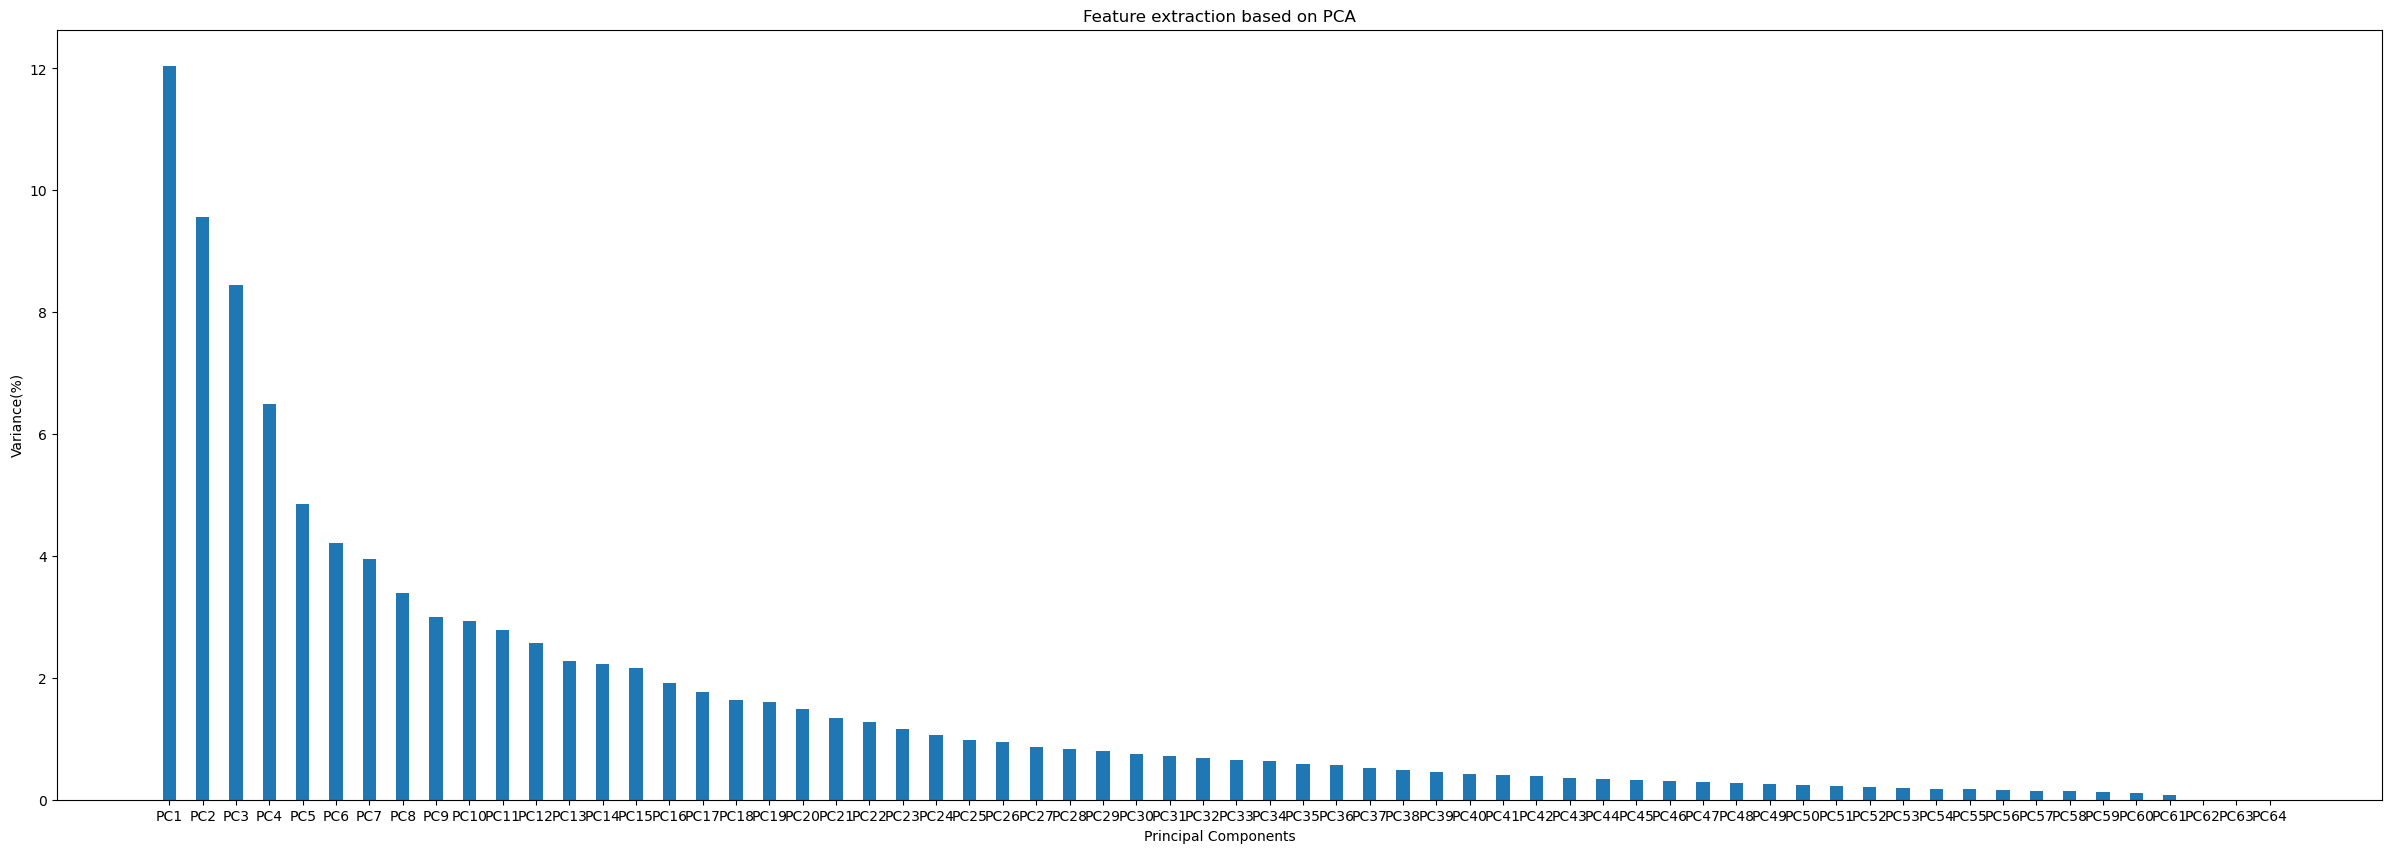

In [232]:
plt.figure(figsize=(30,10))
plt.bar(final_table.columns,final_table.loc['Variance(%)'],width = 0.4)
plt.xlabel('Principal Components')
plt.ylabel('Variance(%)')
plt.title('Feature extraction based on PCA')

Text(0.5, 1.0, 'Feature extraction based on PCA')

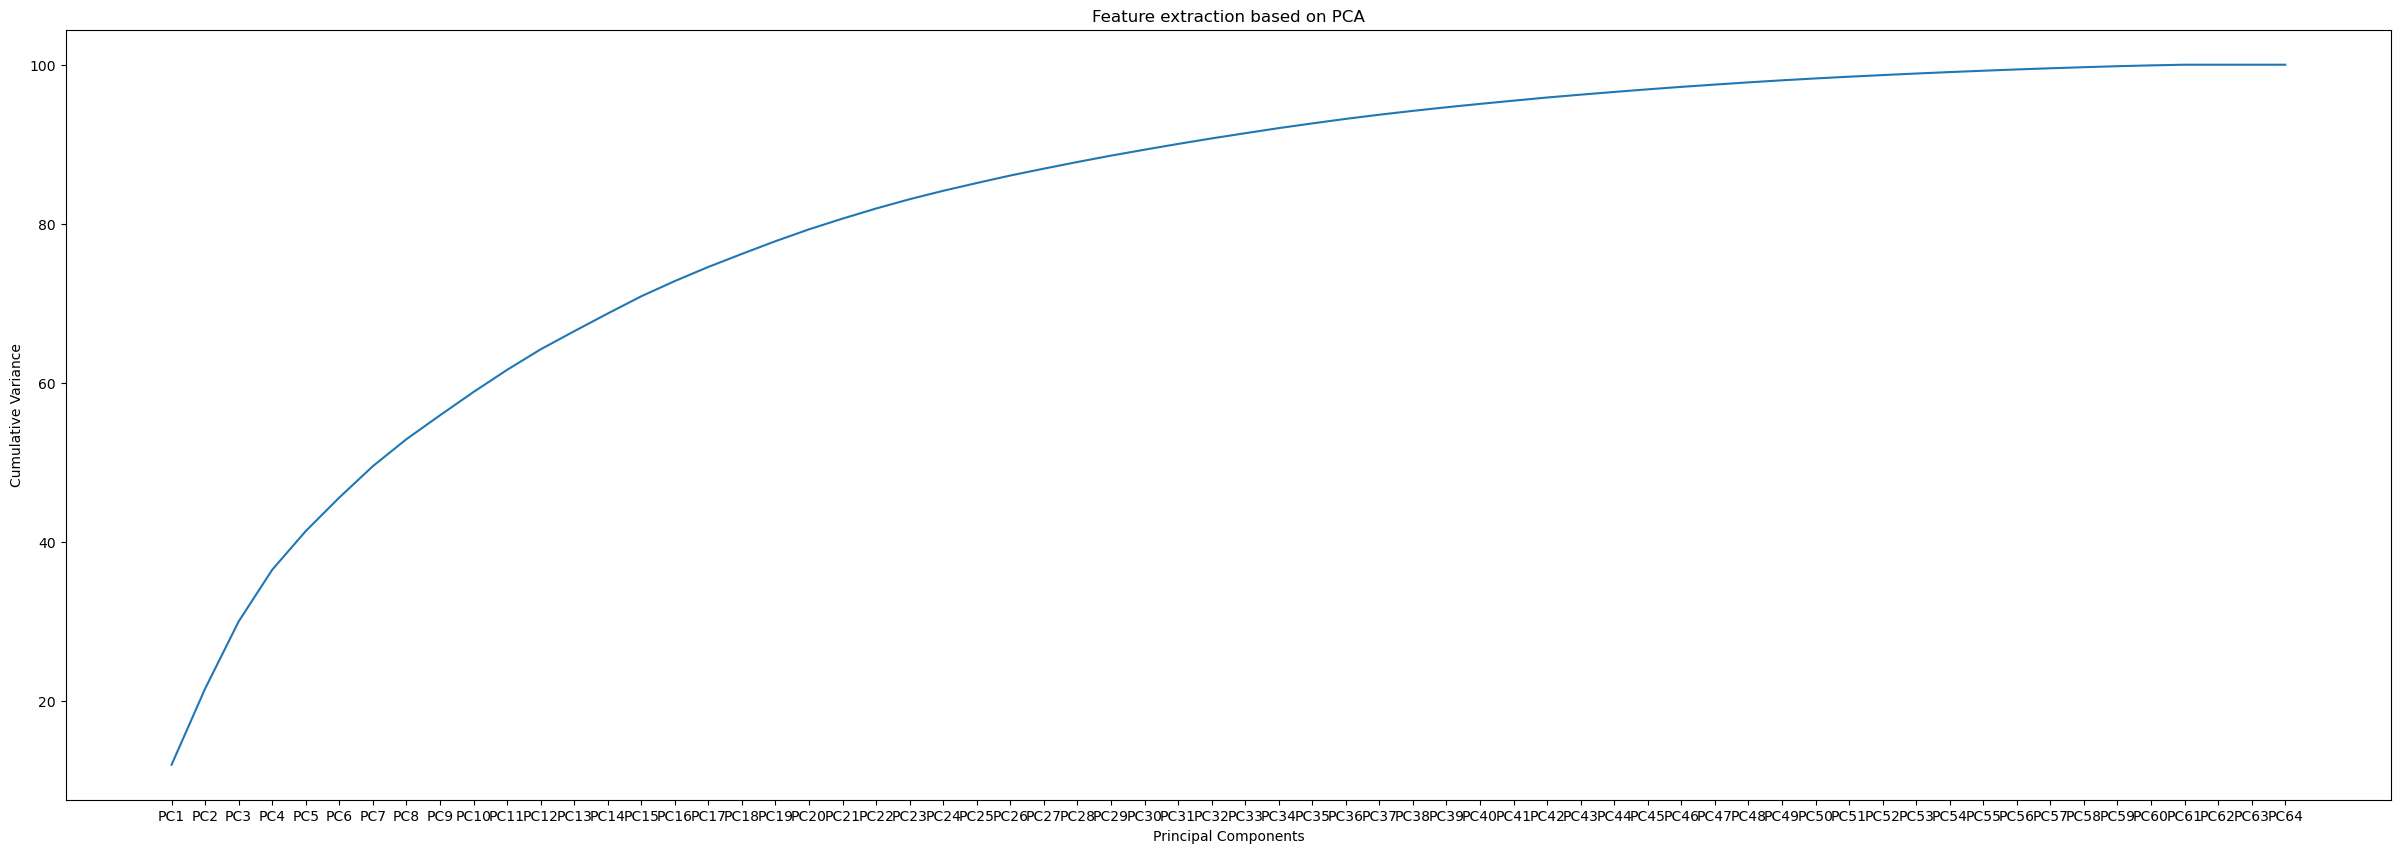

In [233]:
plt.figure(figsize=(30,10))
plt.plot(final_table.columns,final_table.loc['Cumulative Variance'])
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Variance')
plt.title('Feature extraction based on PCA')

In [234]:
# selecting principal components that contain 95% varinace or information

l = list()

for i in final_table.columns:
    l.append(i)
    if final_table[i]['Cumulative Variance'] > 95 :
        break
print('The principal component(s) that cover more than 95% information are ',l)

The principal component(s) that cover more than 95% information are  ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 'PC40']


In [235]:
# extracted principal components

extracted_table = final_table[l]
extracted_table

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
Variance,7.340689,5.832243,5.151093,3.964029,2.964694,2.570613,2.404671,2.067522,1.828915,1.788522,...,0.442605,0.422066,0.398884,0.390883,0.360744,0.348409,0.319418,0.293903,0.276769,0.258129
Variance(%),12.033916,9.561054,8.444415,6.498408,4.860155,4.214120,3.942083,3.389381,2.998221,2.932003,...,0.725582,0.691911,0.653909,0.640793,0.591384,0.571162,0.523637,0.481808,0.453719,0.423163
Cumulative Variance,12.033916,21.594971,30.039385,36.537793,41.397948,45.612068,49.554151,52.943532,55.941753,58.873755,...,90.046426,90.738337,91.392246,92.033038,92.624422,93.195585,93.719222,94.201029,94.654748,95.077911


In [236]:
# or we just can extract the number of principal components we want

l = list()
no_of_component = 2
count = 0

for i in final_table.columns:
    l.append(i)
    count = count + 1
    if count == no_of_component :
        break
print('The principal component(s) are ',l)

The principal component(s) are  ['PC1', 'PC2']


In [237]:
# extracted principal components

extracted_table = final_table[l]
extracted_table

,PC1,PC2
Variance,7.340689,5.832243
Variance(%),12.033916,9.561054
Cumulative Variance,12.033916,21.594971


Text(0, 0.5, 'PC2')

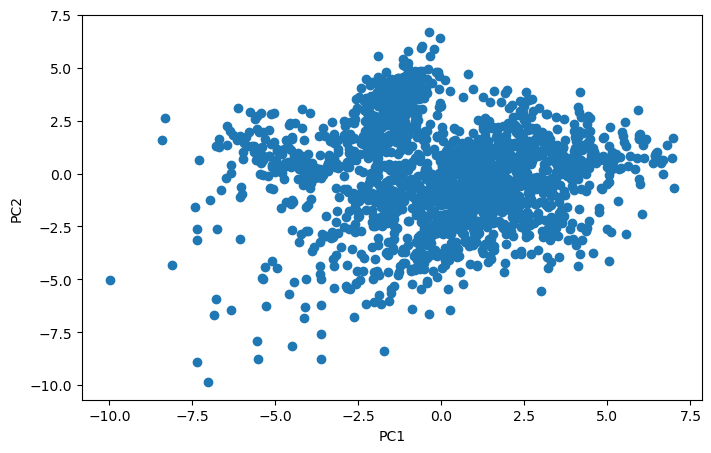

In [238]:
plt.figure(figsize=(8,5))
plt.scatter(transformed_table['PC1'],transformed_table['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'Second Principal Component')

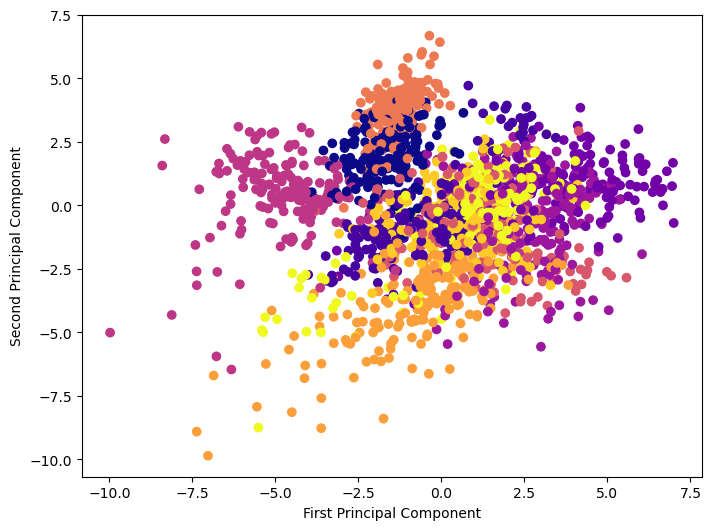

In [239]:
plt.figure(figsize=(8,6))
plt.scatter(transformed_table['PC1'],transformed_table['PC2'],c=digit['target'],cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

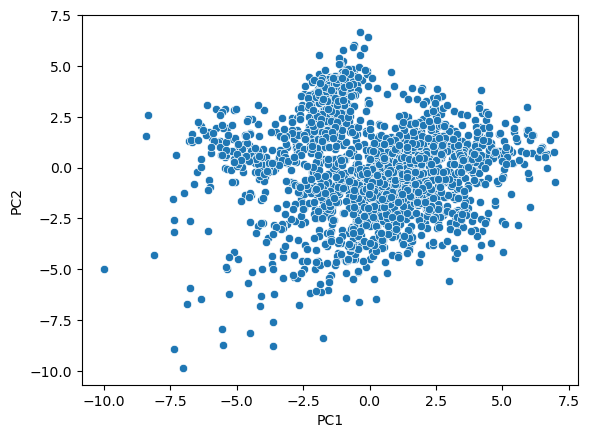

In [240]:
sns.scatterplot(x = transformed_table['PC1'],y = transformed_table['PC2'])

In [241]:
print(transformed_table['PC1'].shape)
print(transformed_table['PC2'].shape)
print(digit['target'].shape)

(1797,)
(1797,)
(1797,)


all of them are same dimension

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

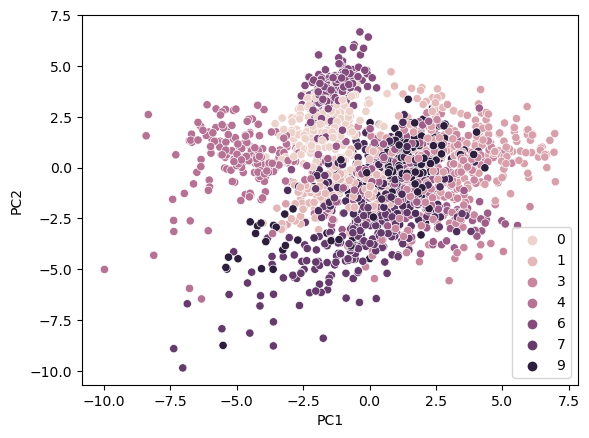

In [242]:
sns.scatterplot(x = transformed_table['PC1'],y = transformed_table['PC2'],hue=digit['target'])

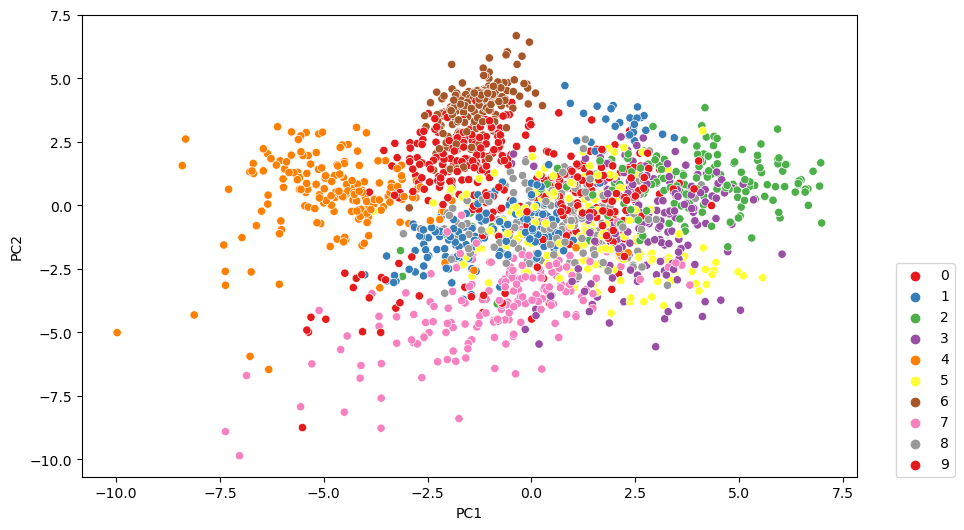

In [243]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = transformed_table['PC1'],y = transformed_table['PC2'],hue=digit['target'],palette='Set1')
plt.legend(loc=(1.05,0))